In [1]:
import torch
import numpy as np
from models.generator import DepthNet
from models.generator import PoseNet
from torchvision import transforms
from PIL import Image
from models.discriminator import Discriminator
# from torchsummary import summary
import matplotlib.pyplot as plt
# import open3d as o3d
import sys
from models.wrap import inverse_warp
from models.GAN import DPGAN

torch.Size([1, 3, 352, 1216])
torch.Size([1, 352, 1216])


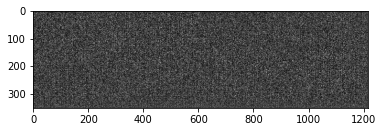

In [2]:
img = Image.open("images/1.png")
transform = transforms.ToTensor()
img = transform(img)
img = img[None, :, :, :]
print(img.shape)

model = DepthNet()
depth = model(img)
depth = torch.squeeze(depth, dim=0)
print(depth.shape)

plt.imshow(np.transpose(depth.detach().numpy(), (1,2,0)), cmap="gray");

torch.Size([1, 3, 352, 1216])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


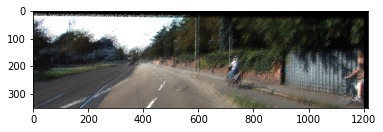

In [3]:
img = Image.open("images/0.png")
transform = transforms.ToTensor()
img = transform(img)
img = img[None, :, :, :]
print(img.shape)

pose_left = torch.tensor([[ 0.0100, -0.0100,  0.0100,  0.0100,  0.0100, -0.0100]])
intrinsics = torch.tensor([[721.5377, 0, 596.5593],
                                           [0, 721.5377, 149.854],
                                           [0, 0, 1]])
rep = inverse_warp(img, depth, pose_left,intrinsics,rotation_mode='euler', padding_mode='zeros')
rep= torch.squeeze(rep[0], dim=0)
plt.imshow(np.transpose(rep.detach().numpy(), (1,2,0)));

In [4]:
dpgan = DPGAN()
# dpgan.to('cuda')
# dpgan.train(None,5,10)

In [ ]:
dpgan.train_model(None,20,100)

Training epoch 0 of 100
Generator loss: 16.813213348388672, Discriminator loss: 2.8188047409057617
---------------------------------------------------------
Training epoch 1 of 100
Generator loss: 7.319419860839844, Discriminator loss: 8.528944969177246
---------------------------------------------------------
Training epoch 2 of 100
Generator loss: 6.9490838050842285, Discriminator loss: 10.741567611694336
---------------------------------------------------------
Training epoch 3 of 100
Generator loss: 7.786854267120361, Discriminator loss: 10.99209213256836
---------------------------------------------------------
Training epoch 4 of 100
Generator loss: 149.6692352294922, Discriminator loss: 9.704442977905273
---------------------------------------------------------
Training epoch 5 of 100
Generator loss: 23.437437057495117, Discriminator loss: 2.564969062805176
---------------------------------------------------------
Training epoch 6 of 100
Generator loss: 11.084588050842285, Discr

Generator loss: 182.40237426757812, Discriminator loss: 0.04894483834505081
---------------------------------------------------------
Training epoch 53 of 100
Generator loss: 190.28221130371094, Discriminator loss: 0.046350788325071335
---------------------------------------------------------
Training epoch 54 of 100
Generator loss: 188.05508422851562, Discriminator loss: 0.04510904848575592
---------------------------------------------------------
Training epoch 55 of 100
Generator loss: 185.45152282714844, Discriminator loss: 0.04557939991354942
---------------------------------------------------------
Training epoch 56 of 100
Generator loss: 186.84231567382812, Discriminator loss: 0.04039783403277397
---------------------------------------------------------
Training epoch 57 of 100
Generator loss: 184.34339904785156, Discriminator loss: 0.04418454319238663
---------------------------------------------------------
Training epoch 58 of 100
Generator loss: 183.8260955810547, Discrimina